### Importing Dependencies


In [ ]:
import numpy as np
import math
import tensorflow as tf  
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D, LeakyReLU, Input
from keras.layers import Conv2D, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.decomposition import PCA

### Loading Datasets

In [ ]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=55)

x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print("\nData after 70:30 split")
print("----------------------\n")
print("X_train shape :", x_train.shape)
print("X_train shape :", y_train.shape)
print("X_train shape :", x_test.shape)
print("X_train shape :", y_test.shape)


Data after 70:30 split
----------------------

X_train shape : (49000, 28, 28, 1)
X_train shape : (49000,)
X_train shape : (21000, 28, 28, 1)
X_train shape : (21000,)


### Normalize Data

In [ ]:
def normalize_data(x_train, x_test):
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    return x_train, x_test
    
x_train, x_test = normalize_data(x_train, x_test)

### Function For plotting Epoch vs loss graph

In [ ]:
def plot_epoch_vs_loss(hist):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_facecolor('w')
    ax.grid(b=False)
    ax.plot(hist.history['loss'], color='red')
    ax.plot(hist.history['val_loss'], color ='green')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

# Autoencoder class

In [ ]:
class Autoencoder:

    def __init__(self, hidden_neurons, optimizer):

        #------------------------------- ENCODER --------------------------------#

        encoder_input = keras.Input(shape=(28, 28, 1))
        input = keras.layers.Flatten()(encoder_input)
        hidden_en = keras.layers.Dense(256, activation="relu")(input)

        encoder_output = keras.layers.Dense(hidden_neurons, activation="relu")(hidden_en)    #-------------> Bottleneck layer

        #------------------------------- DECODER --------------------------------#

        decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
        hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
        decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

        self.encoder = keras.Model(encoder_input, encoder_output, name='encoder')
        self.autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

        self.autoencoder.compile(optimizer, loss = 'mse')


    def train(self, epoch, x_train):
        history_adam_64 = self.autoencoder.fit(x_train, x_train, epochs=epoch, batch_size=32, validation_split=0.3)
        return history_adam_64  

    
    def show_latent_representation(self, x_test):
        latent = self.encoder.predict(x_test)
        print("Latent representation of image")
        print("------------------------------\n")
        plt.imshow(latent[0].reshape((8,8)))

    
    def show_reconstructed_image(self, x_test):
        reconstructed_image = self.autoencoder.predict(x_test)
        print("Reconstructed image")
        print("-------------------\n")
        plt.imshow(reconstructed_image[0].reshape((28,28)))


In [ ]:
autoencoder = Autoencoder(64, 'Adam')
hist = autoencoder.train(10, x_train)

Epoch 1/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0325 - val_loss: 0.0152
Epoch 2/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0148 - val_loss: 0.0139
Epoch 3/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0138 - val_loss: 0.0135
Epoch 4/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 5/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0127 - val_loss: 0.0123
Epoch 6/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 7/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0120 - val_loss: 0.0115
Epoch 8/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 9/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 10/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.011

Latent representation of image
------------------------------



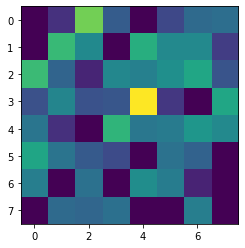

In [ ]:
autoencoder.show_latent_representation(x_test)

Reconstructed image
-------------------



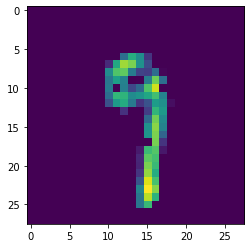

In [ ]:
autoencoder.show_reconstructed_image(x_test)

Actual image
------------



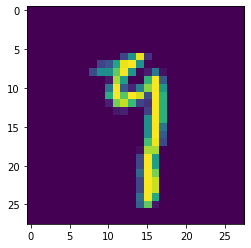

In [ ]:
print("Actual image")
print("------------\n")
plt.imshow(x_test[0].reshape((28,28)))

# Experimenting with different optimizers

### 1. ADAM

#### a) Hidden Neurons = 64

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(64, activation="relu")(hidden_en)    #-------------> Bottleneck layer
decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)
optimizer = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.compile(optimizer, loss='mse')
history_adam_64 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0304 - val_loss: 0.0140
Epoch 2/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0135 - val_loss: 0.0125
Epoch 3/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 4/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 5/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 6/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 7/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 8/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0106 - val_loss: 0.0104
Epoch 9/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 10/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.010

Epoch vs loss for ADAM (Hidden Neurons = 64)
----------------------



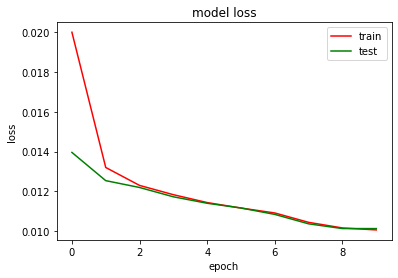

In [ ]:
print("Epoch vs loss for ADAM (Hidden Neurons = 64)")
print("----------------------\n")
plot_epoch_vs_loss(history_adam_64)

#### b) Hidden Neurons = 128

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(128, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

optimizer = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile(optimizer, loss='mse')
history_adam_128 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0282 - val_loss: 0.0106
Epoch 2/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 3/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0092 - val_loss: 0.0088
Epoch 4/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 5/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 6/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 7/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 8/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 9/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 10/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.007

Epoch vs loss for ADAM (Hidden Neurons = 128)
--------------------------------------------



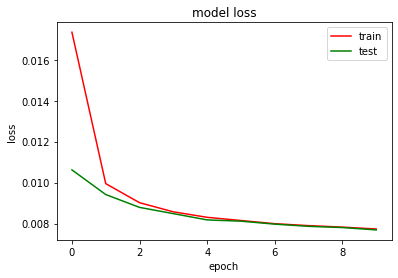

In [ ]:
print("Epoch vs loss for ADAM (Hidden Neurons = 128)")
print("--------------------------------------------\n")
plot_epoch_vs_loss(history_adam_128)

### c) Hidden Neurons = 32

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(32, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

optimizer = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile(optimizer, loss='mse')
history_adam_32 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0356 - val_loss: 0.0184
Epoch 2/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0176 - val_loss: 0.0166
Epoch 3/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0161 - val_loss: 0.0153
Epoch 4/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0151 - val_loss: 0.0148
Epoch 5/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0146 - val_loss: 0.0144
Epoch 6/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0141 - val_loss: 0.0141
Epoch 7/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 8/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0133 - val_loss: 0.0134
Epoch 9/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0130 - val_loss: 0.0131
Epoch 10/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.012

Epoch vs loss for ADAM (Hidden Neurons = 32)
--------------------------------------------



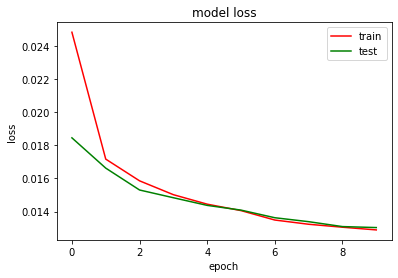

In [ ]:
print("Epoch vs loss for ADAM (Hidden Neurons = 32)")
print("--------------------------------------------\n")
plot_epoch_vs_loss(history_adam_32)

### 2. RMSProp

#### a) Hidden Neurons = 64

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(64, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile('RMSProp', loss='mse')
history_rms_64 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0369 - val_loss: 0.0201
Epoch 2/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0194 - val_loss: 0.0167
Epoch 3/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0165 - val_loss: 0.0153
Epoch 4/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0153 - val_loss: 0.0142
Epoch 5/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0146 - val_loss: 0.0146
Epoch 6/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0141 - val_loss: 0.0141
Epoch 7/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0138 - val_loss: 0.0142
Epoch 8/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0133 - val_loss: 0.0136
Epoch 9/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0129 - val_loss: 0.0127
Epoch 10/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.012

Epoch vs loss for RMSProp (Hidden Neurons = 64)
----------------------------------------------



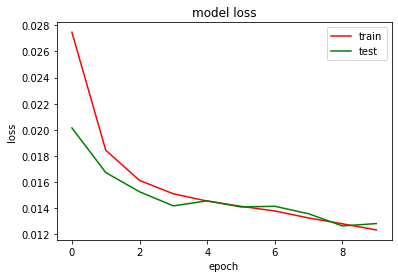

In [ ]:
print("Epoch vs loss for RMSProp (Hidden Neurons = 64)")
print("----------------------------------------------\n")
plot_epoch_vs_loss(history_rms_64)

#### b) Hidden Neurons = 128

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(128, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile('RMSProp', loss='mse')
history_rms_128 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 10s 9ms/step - loss: 0.0330 - val_loss: 0.0182
Epoch 2/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0160 - val_loss: 0.0156
Epoch 3/10
1072/1072 [==============================] - 9s 9ms/step - loss: 0.0138 - val_loss: 0.0131
Epoch 4/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0129 - val_loss: 0.0124
Epoch 5/10
1072/1072 [==============================] - 9s 9ms/step - loss: 0.0122 - val_loss: 0.0130
Epoch 6/10
1072/1072 [==============================] - 9s 9ms/step - loss: 0.0116 - val_loss: 0.0125
Epoch 7/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0113 - val_loss: 0.0126
Epoch 8/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0109 - val_loss: 0.0116
Epoch 9/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0104 - val_loss: 0.0112
Epoch 10/10
1072/1072 [==============================] - 9s 9ms/step - loss: 0.01

Epoch vs loss for RMSProp (Hidden Neurons = 128)
----------------------------------------------



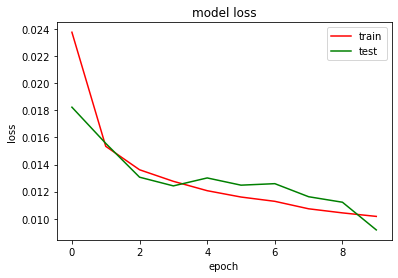

In [ ]:
print("Epoch vs loss for RMSProp (Hidden Neurons = 128)")
print("----------------------------------------------\n")
plot_epoch_vs_loss(history_rms_128)

#### c) Hidden Neurons = 32

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(32, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile('RMSProp', loss='mse')
history_rms_32 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.0382 - val_loss: 0.0198
Epoch 2/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0196 - val_loss: 0.0168
Epoch 3/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0167 - val_loss: 0.0152
Epoch 4/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0154 - val_loss: 0.0152
Epoch 5/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0146 - val_loss: 0.0136
Epoch 6/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0140 - val_loss: 0.0139
Epoch 7/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0135 - val_loss: 0.0140
Epoch 8/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0130 - val_loss: 0.0125
Epoch 9/10
1072/1072 [==============================] - 8s 8ms/step - loss: 0.0129 - val_loss: 0.0129
Epoch 10/10
1072/1072 [==============================] - 9s 8ms/step - loss: 0.012

Epoch vs loss for RMSProp (Hidden Neurons = 32)
----------------------------------------------



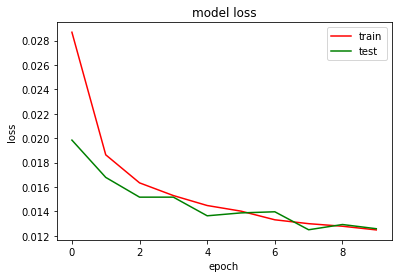

In [ ]:
print("Epoch vs loss for RMSProp (Hidden Neurons = 32)")
print("----------------------------------------------\n")
plot_epoch_vs_loss(history_rms_32)

### 3. SGD with Momentum

#### a) Hidden Neurons = 64

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(64, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum = 0.9)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile(optimizer, loss='mse')
history_sgd_64 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.1052 - val_loss: 0.0997
Epoch 2/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0978 - val_loss: 0.0900
Epoch 3/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0879 - val_loss: 0.0818
Epoch 4/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0809 - val_loss: 0.0780
Epoch 5/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0776 - val_loss: 0.0760
Epoch 6/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0757 - val_loss: 0.0747
Epoch 7/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0747 - val_loss: 0.0739
Epoch 8/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0738 - val_loss: 0.0734
Epoch 9/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0734 - val_loss: 0.0731
Epoch 10/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.073

Epoch vs loss for SGD With Momentum (Hidden Neurons = 64)
----------------------------------



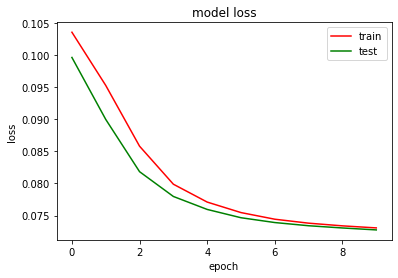

In [ ]:
print("Epoch vs loss for SGD With Momentum (Hidden Neurons = 64)")
print("----------------------------------\n")
plot_epoch_vs_loss(history_sgd_64)

#### b) Hidden Neurons = 128

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(128, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum = 0.9)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile(optimizer, loss='mse')
history_sgd_128 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.1041 - val_loss: 0.0981
Epoch 2/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0960 - val_loss: 0.0883
Epoch 3/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0862 - val_loss: 0.0809
Epoch 4/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0799 - val_loss: 0.0767
Epoch 5/10
1072/1072 [==============================] - 8s 7ms/step - loss: 0.0762 - val_loss: 0.0749
Epoch 6/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0747 - val_loss: 0.0739
Epoch 7/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0742 - val_loss: 0.0732
Epoch 8/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0731 - val_loss: 0.0727
Epoch 9/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0726 - val_loss: 0.0723
Epoch 10/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.072

Epoch vs loss for SGD With Momentum (Hidden Neurons = 128)
----------------------------------



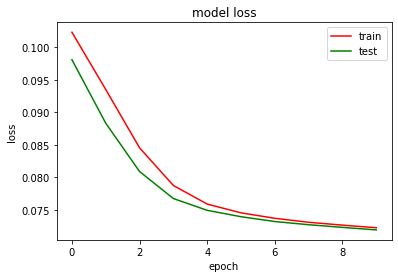

In [ ]:
print("Epoch vs loss for SGD With Momentum (Hidden Neurons = 128)")
print("----------------------------------\n")
plot_epoch_vs_loss(history_sgd_128)

#### c) Hidden Neurons = 32

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(32, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum = 0.9)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile(optimizer, loss='mse')
history_sgd_32 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.1041 - val_loss: 0.0972
Epoch 2/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0946 - val_loss: 0.0863
Epoch 3/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.0843 - val_loss: 0.0792
Epoch 4/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0783 - val_loss: 0.0761
Epoch 5/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0759 - val_loss: 0.0747
Epoch 6/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0747 - val_loss: 0.0740
Epoch 7/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0740 - val_loss: 0.0736
Epoch 8/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0737 - val_loss: 0.0733
Epoch 9/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0736 - val_loss: 0.0730
Epoch 10/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.072

Epoch vs loss for SGD With Momentum (Hidden Neurons = 32)
----------------------------------



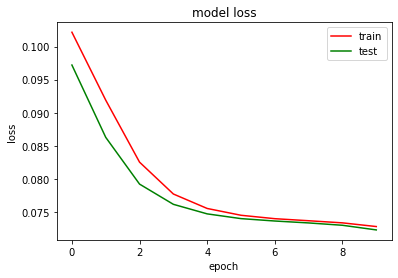

In [ ]:
print("Epoch vs loss for SGD With Momentum (Hidden Neurons = 32)")
print("----------------------------------\n")
plot_epoch_vs_loss(history_sgd_32)

### 4. SGD Without Momentum

#### a) Hidden Neurons = 64

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(64, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile('SGD', loss='mse')
history_sgdm_64 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.1045 - val_loss: 0.0976
Epoch 2/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0953 - val_loss: 0.0884
Epoch 3/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0869 - val_loss: 0.0828
Epoch 4/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0822 - val_loss: 0.0802
Epoch 5/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0802 - val_loss: 0.0792
Epoch 6/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0792 - val_loss: 0.0785
Epoch 7/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0786 - val_loss: 0.0780
Epoch 8/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0783 - val_loss: 0.0777
Epoch 9/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0779 - val_loss: 0.0773
Epoch 10/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.077

Epoch vs loss for SGD Without Momentum (Hidden Neuron = 64)
----------------------------------------------------------



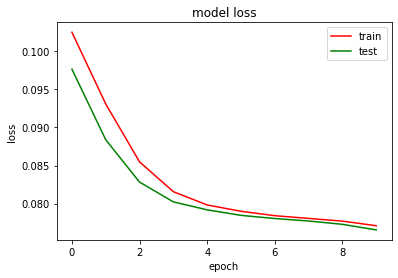

In [ ]:
print("Epoch vs loss for SGD Without Momentum (Hidden Neuron = 64)")
print("----------------------------------------------------------\n")
plot_epoch_vs_loss(history_sgdm_64)

#### b) Hidden Neurons = 128

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(128, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile('SGD', loss='mse')
history_sgdm_128 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.1052 - val_loss: 0.0998
Epoch 2/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0974 - val_loss: 0.0898
Epoch 3/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0879 - val_loss: 0.0820
Epoch 4/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0810 - val_loss: 0.0781
Epoch 5/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0778 - val_loss: 0.0763
Epoch 6/10
1072/1072 [==============================] - 7s 7ms/step - loss: 0.0763 - val_loss: 0.0754
Epoch 7/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0754 - val_loss: 0.0748
Epoch 8/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0748 - val_loss: 0.0743
Epoch 9/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.0745 - val_loss: 0.0737
Epoch 10/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.073

Epoch vs loss for SGD Without Momentum (Hidden Neuron = 128)
----------------------------------------------------------



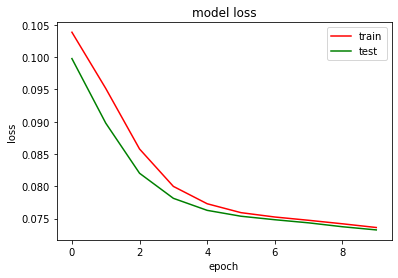

In [ ]:
print("Epoch vs loss for SGD Without Momentum (Hidden Neuron = 128)")
print("----------------------------------------------------------\n")
plot_epoch_vs_loss(history_sgdm_128)

#### c) Hidden Neurons = 32

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1))
input = keras.layers.Flatten()(encoder_input)
hidden_en = keras.layers.Dense(256, activation="relu")(input)
encoder_output = keras.layers.Dense(32, activation="relu")(hidden_en)    #-------------> Bottleneck layer

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256, activation="relu")(encoder_output)
hidden_de = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28))(hidden_de)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
#autoencoder.summary()
autoencoder.compile('SGD', loss='mse')
history_sgdm_32 = autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.3)  

Epoch 1/10
1072/1072 [==============================] - 7s 6ms/step - loss: 0.1084 - val_loss: 0.1043
Epoch 2/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.1028 - val_loss: 0.0956
Epoch 3/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.0936 - val_loss: 0.0862
Epoch 4/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.0846 - val_loss: 0.0800
Epoch 5/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.0792 - val_loss: 0.0773
Epoch 6/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.0772 - val_loss: 0.0761
Epoch 7/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.0763 - val_loss: 0.0756
Epoch 8/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.0757 - val_loss: 0.0753
Epoch 9/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.0756 - val_loss: 0.0751
Epoch 10/10
1072/1072 [==============================] - 6s 6ms/step - loss: 0.075

Epoch vs loss for SGD Without Momentum (Hidden Neuron = 32)
----------------------------------------------------------



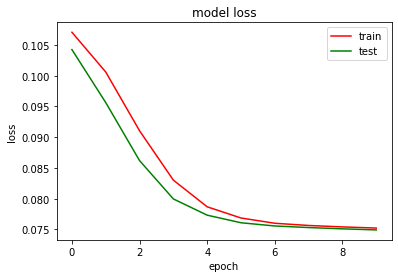

In [ ]:
print("Epoch vs loss for SGD Without Momentum (Hidden Neuron = 32)")
print("----------------------------------------------------------\n")
plot_epoch_vs_loss(history_sgdm_32)

### Comparision between above optimizers and hidden layer neurons

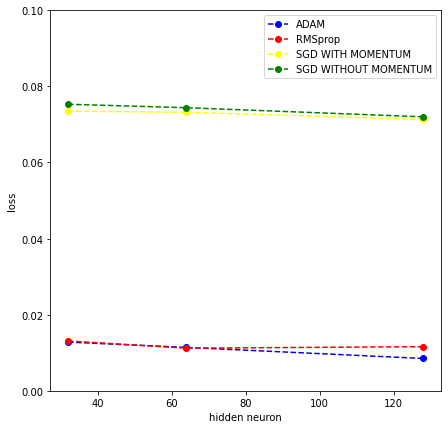

In [ ]:
y1 = [0.0128,0.0114,0.0085]  
y2 = [0.0131,0.0112,0.0116]  
y3 = [0.0735,0.0732,0.0713]  
y4 = [0.0753,0.0744,0.0720]  
x1 = [32,64,128]
s=plt.figure()
s.set_figwidth(7)
s.set_figheight(7)
plt.plot(x1, y1,color="blue",linestyle="dashed",marker="o",markerfacecolor="blue", label = "ADAM")
plt.plot(x1, y2,color="red",linestyle="dashed",marker="o",markerfacecolor="red", label = "RMSprop")
plt.plot(x1, y3,color="yellow",linestyle="dashed",marker="o",markerfacecolor="yellow", label = "SGD WITH MOMENTUM")
plt.plot(x1, y4,color="green",linestyle="dashed",marker="o",markerfacecolor="green", label = "SGD WITHOUT MOMENTUM")
plt.xlabel('hidden neuron')
plt.ylabel('loss')
plt.ylim([0.0, 0.1])
plt.legend(loc='upper right')

### **INFERENCE** : 
#### Best Optimizer : ADAM with 128 neurons in hidden layer

## PCA Transformation and Reconstruction

In [ ]:
hist_pca = []

xtrain = x_train.reshape(49000, 784)
xtest = x_test.reshape(21000, 784)

for i in [32, 64, 128]:
    p = PCA(n_components = i, svd_solver = 'randomized')
    pca = p.fit(xtrain)

    x_transformed = pca.transform(xtest)     #--------------------------> Transformation
    x_reconstructed = pca.inverse_transform(x_transformed)    #---------> Reconstruction

    hist_pca.append(keras.losses.MeanSquaredError()(x_reconstructed, xtest).numpy())

### Comparision between PCA and Autoencoders loss

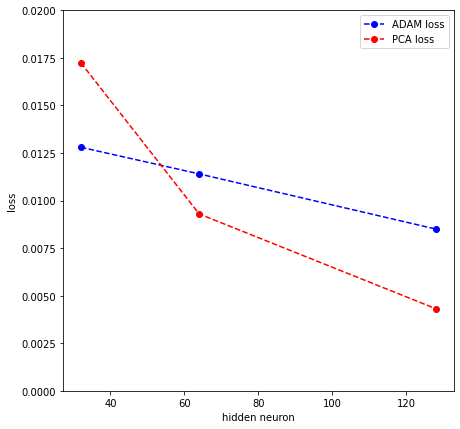

In [ ]:
y1 = [0.0128,0.0114,0.0085]  
y2 = [hist_pca[0], hist_pca[1], hist_pca[2]]  

x1 = [32,64,128]
s=plt.figure()
s.set_figwidth(7)
s.set_figheight(7)

plt.plot(x1, y1,color="blue",linestyle="dashed",marker="o",markerfacecolor="blue", label = "ADAM loss")
plt.plot(x1, y2,color="red",linestyle="dashed",marker="o",markerfacecolor="red", label = "PCA loss")

plt.xlabel('hidden neuron')
plt.ylabel('loss')
plt.ylim([0.0, 0.02])
plt.legend(loc='upper right')

INFERENCE : Autoencoders performs better when bottleneck layer is more compressed whereas PCA performs better with less compressed bottleneck layer